<a href="https://colab.research.google.com/github/Ahmed-Shatla/Feature-Map-Visualization/blob/main/feature_map_visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading a pretrained model

In [1]:
from keras.models import load_model
model = load_model('/content/dogcat_model_bak.h5')

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               8

In [3]:
cat_img = '/content/cat_164.jpg'

In [4]:
from keras.preprocessing import image
import numpy as np
img = image.load_img(cat_img,target_size=(64,64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)


(1, 64, 64, 3)


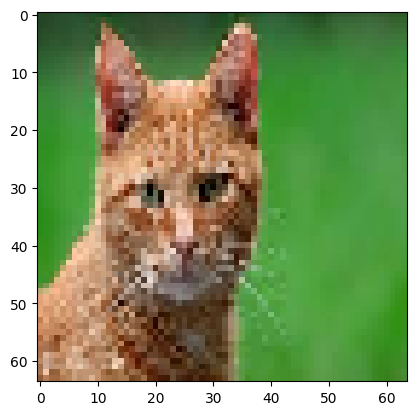

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [6]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:3]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


In [7]:
activation_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer  [(None, 64, 64, 3)]       0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 4s 4s/step


In [9]:
len(activations)


3

In [14]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 62, 62, 32)


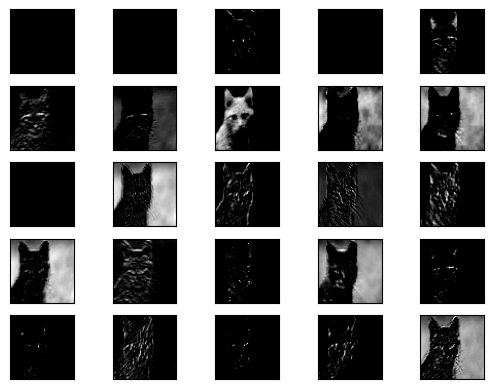

In [24]:
import matplotlib.pyplot as plt
square = 5
ix = 1
for _ in range(square):
  for _ in range(square):
 # specify subplot and turn of axis
    ax = plt.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
 # plot filter channel in grayscale
    plt.imshow(first_layer_activation[0, :, :, ix-1], cmap='gray')
    ix += 1
# show the figure
plt.show()

In [26]:
second_layer_activation = activations[2]
print(second_layer_activation.shape)

(1, 29, 29, 32)


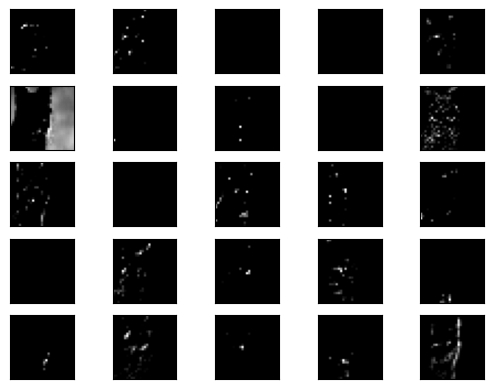

In [27]:
import matplotlib.pyplot as plt
square = 5
ix = 1
for _ in range(square):
  for _ in range(square):
 # specify subplot and turn of axis
    ax = plt.subplot(square, square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
 # plot filter channel in grayscale
    plt.imshow(second_layer_activation[0, :, :, ix-1], cmap='gray')
    ix += 1
# show the figure
plt.show()